# Project I : Fake News Detection.

In [1]:
#Importing libraries.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import string as st
from wordcloud import WordCloud
import nltk
from nltk import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from mlxtend.plotting import plot_confusion_matrix

In [2]:
#Loading data.
news_df = pd.read_csv('news.csv')

In [3]:
#checking the data structure.
news_df.shape

(6335, 4)

In [4]:
#Glimpse of the data.
news_df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [5]:
#checking for null values.
news_df.isnull().sum()

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

The dataset does not have null values. 

# Exploratory Data Analysis (EDA).

In [6]:
#Removing all punctuations.
def remove_punctuation(text):
    return ("".join([ch for ch in text if ch not in st.punctuation]))

In [7]:
news_df['New_text']=news_df['text'].apply(lambda x: remove_punctuation(x))     
news_df.head()

,Unnamed: 0,title,text,label,New_text
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,Daniel Greenfield a Shillman Journalism Fellow...
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,Google Pinterest Digg Linkedin Reddit Stumbleu...
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,US Secretary of State John F Kerry said Monday...
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,— Kaydee King KaydeeKing November 9 2016 The l...
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,Its primary day in New York and frontrunners H...


In [8]:
 #Dropping the feature which we don't need
news_df = news_df.drop(['Unnamed: 0'],axis=1)   
news_df.head()

,title,text,label,New_text
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,Daniel Greenfield a Shillman Journalism Fellow...
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,Google Pinterest Digg Linkedin Reddit Stumbleu...
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,US Secretary of State John F Kerry said Monday...
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,— Kaydee King KaydeeKing November 9 2016 The l...
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,Its primary day in New York and frontrunners H...


In [9]:
#Convert text in lower case, Split() applied for white space
import re
def tokenize(text):
    text = re.split('\s+', text)
    return [x.lower() for x in text]

In [10]:
news_df['New_text'] = news_df['New_text'].apply(lambda msg:tokenize(msg))
news_df.head()

,title,text,label,New_text
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,"[daniel, greenfield, a, shillman, journalism, ..."
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,"[google, pinterest, digg, linkedin, reddit, st..."
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,"[us, secretary, of, state, john, f, kerry, sai..."
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,"[—, kaydee, king, kaydeeking, november, 9, 201..."
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,"[its, primary, day, in, new, york, and, frontr..."


In [11]:
#Removal of tokens less than length 2.
def remove_small_words(text):
    return [x for x in text if len(x)>2]

In [12]:
news_df['New_text'] = news_df['New_text'].apply(lambda x: remove_small_words(x))
news_df.head()

,title,text,label,New_text
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,"[daniel, greenfield, shillman, journalism, fel..."
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,"[google, pinterest, digg, linkedin, reddit, st..."
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,"[secretary, state, john, kerry, said, monday, ..."
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,"[kaydee, king, kaydeeking, november, 2016, the..."
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,"[its, primary, day, new, york, and, frontrunne..."


In [13]:
#Remove stopwords.
def remove_stopword(text):
    return[word for word in text if word not in nltk.corpus.stopwords.words('english')]

In [14]:
news_df['New_text'] = news_df['New_text'].apply(lambda x: remove_stopword(x))
news_df.head()

,title,text,label,New_text
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,"[daniel, greenfield, shillman, journalism, fel..."
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,"[google, pinterest, digg, linkedin, reddit, st..."
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,"[secretary, state, john, kerry, said, monday, ..."
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,"[kaydee, king, kaydeeking, november, 2016, les..."
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,"[primary, day, new, york, frontrunners, hillar..."


In [15]:
#Lemmetization
def lemmatizer(text):
    word_net = WordNetLemmatizer()
    return [word_net.lemmatize(word) for word in text]

In [16]:
news_df['New_text'] = news_df['New_text'].apply(lambda x: lemmatizer(x))
news_df.head(10)

,title,text,label,New_text
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,"[daniel, greenfield, shillman, journalism, fel..."
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,"[google, pinterest, digg, linkedin, reddit, st..."
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,"[secretary, state, john, kerry, said, monday, ..."
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,"[kaydee, king, kaydeeking, november, 2016, les..."
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,"[primary, day, new, york, frontrunners, hillar..."
5,"Tehran, USA","\nI’m not an immigrant, but my grandparents ...",FAKE,"[i’m, immigrant, grandparent, year, ago, arriv..."
6,Girl Horrified At What She Watches Boyfriend D...,"Share This Baylee Luciani (left), Screenshot o...",FAKE,"[share, baylee, luciani, left, screenshot, bay..."
7,‘Britain’s Schindler’ Dies at 106,A Czech stockbroker who saved more than 650 Je...,REAL,"[czech, stockbroker, saved, 650, jewish, child..."
8,Fact check: Trump and Clinton at the 'commande...,Hillary Clinton and Donald Trump made some ina...,REAL,"[hillary, clinton, donald, trump, made, inaccu..."
9,Iran reportedly makes new push for uranium con...,Iranian negotiators reportedly have made a las...,REAL,"[iranian, negotiator, reportedly, made, lastdi..."


In [17]:
# Create sentences to get clean text as input for vectors
def return_sentances(tokens):
    return " ".join([word for word in tokens])

In [18]:
news_df['New_text'] = news_df['New_text'].apply(lambda x: return_sentances(x))
news_df.head()

,title,text,label,New_text
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,daniel greenfield shillman journalism fellow f...
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,google pinterest digg linkedin reddit stumbleu...
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,secretary state john kerry said monday stop pa...
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,kaydee king kaydeeking november 2016 lesson to...
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,primary day new york frontrunners hillary clin...


### Word Cloud 

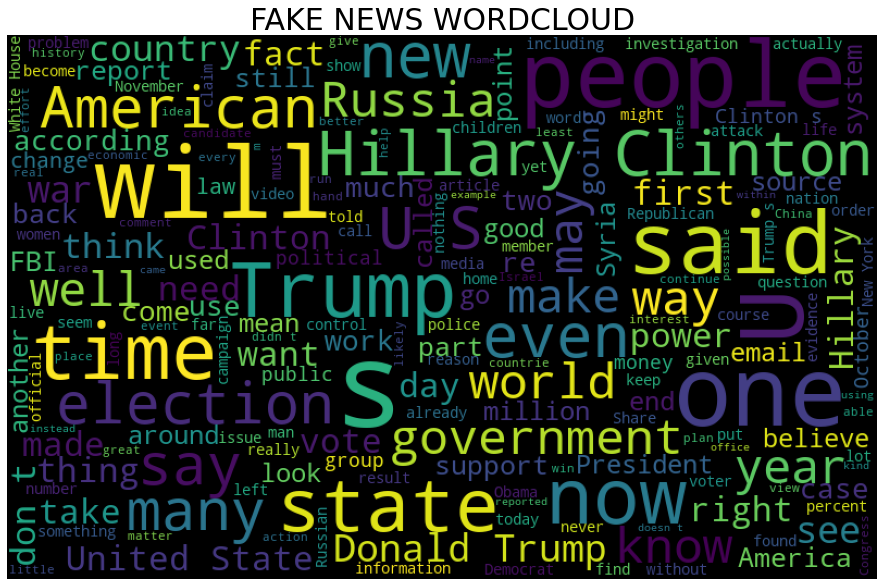

In [19]:
# Create and generate a word cloud image FAKE_NEWS
fake_data = news_df[news_df["label"] == "FAKE"]
fake_text = ' '.join([text for text in fake_data.text])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(fake_text)
plt.figure(figsize= [20,10])
plt.imshow(wordcloud)
plt.axis("off")
plt.title('FAKE NEWS WORDCLOUD',fontsize= 30)
plt.show()

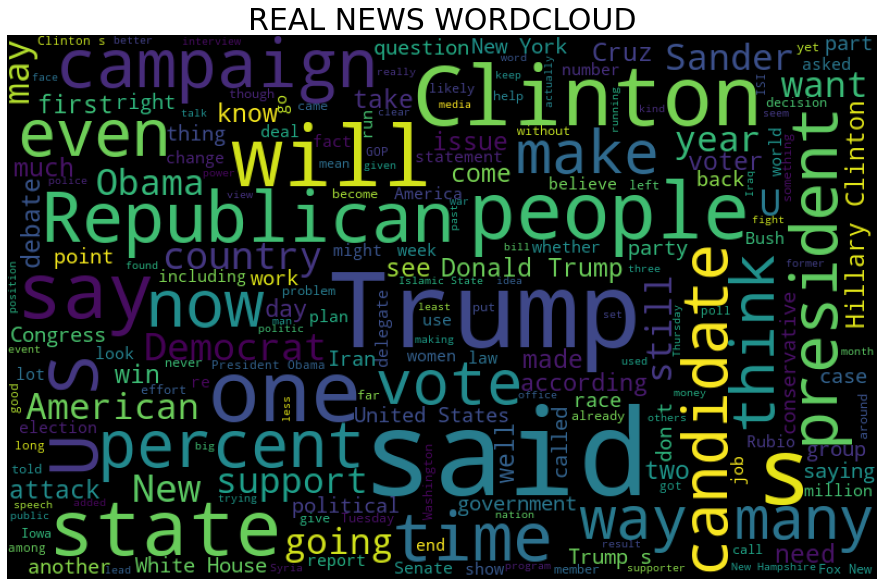

In [20]:
# Create and generate a word cloud image REAL_NEWS
real_data = news_df[news_df["label"] == "REAL"]
real_text = ' '.join([text for text in real_data.text])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(real_text)
plt.figure(figsize= [20,10])
plt.imshow(wordcloud)
plt.axis("off")
plt.title('REAL NEWS WORDCLOUD',fontsize= 30)
plt.show()

label
FAKE    3164
REAL    3171
Name: text, dtype: int64


C:\Users\dpend\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

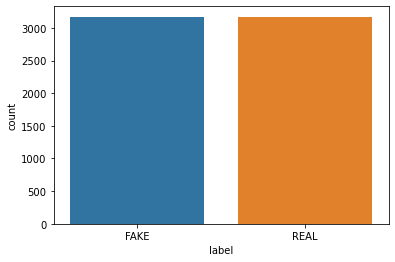

In [21]:
#Comparing the frequency of Fake and Real News.         
print(news_df.groupby(['label'])['text'].count())
sns.countplot(news_df['label'])

Text(0.5, 1.0, 'Fake news')

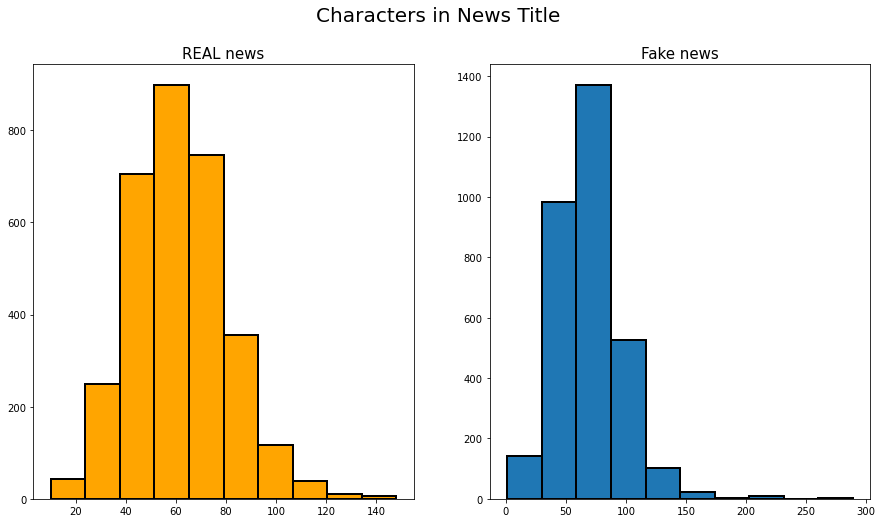

In [22]:
#Comparing the Total numbers of Characters in the Feature Title.
fig, (ax1,ax2)=plt.subplots(1,2,figsize=(15,8))
fig.suptitle('Characters in News Title',fontsize=20)
news_len=news_df[news_df['label']=='REAL']['title'].str.len()
ax1.hist(news_len,color='orange',linewidth=2,edgecolor='black')
ax1.set_title('REAL news',fontsize=15)
news_len=news_df[news_df['label']=='FAKE']['title'].str.len()
ax2.hist(news_len,linewidth=2,edgecolor='black')
ax2.set_title('Fake news',fontsize=15)

Text(0.5, 1.0, 'Fake news')

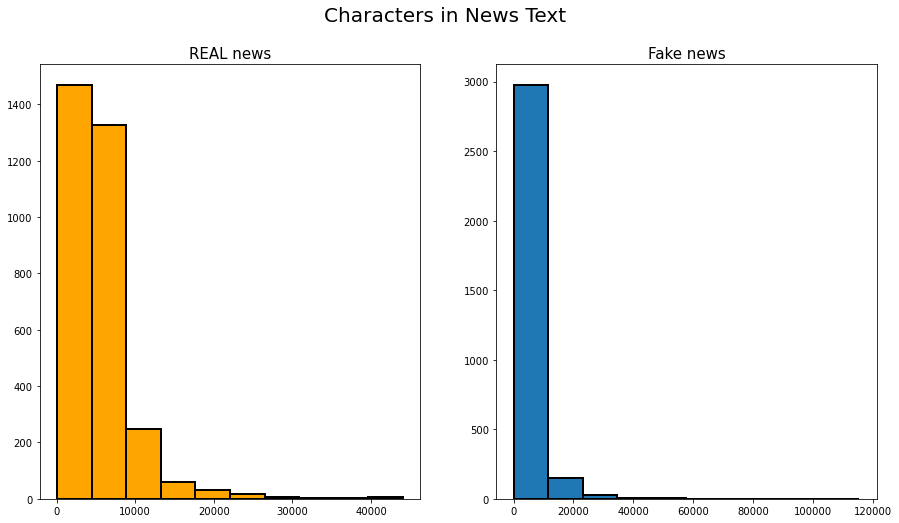

In [23]:
#Comparing the Total numbers of Characters in the Feature Text.
fig, (ax1,ax2)=plt.subplots(1,2,figsize=(15,8))
fig.suptitle('Characters in News Text',fontsize=20)
news_len=news_df[news_df['label']=='REAL']['text'].str.len()
ax1.hist(news_len,color='orange',linewidth=2,edgecolor='black')
ax1.set_title('REAL news',fontsize=15)
news_len=news_df[news_df['label']=='FAKE']['text'].str.len()
ax2.hist(news_len,linewidth=2,edgecolor='black')
ax2.set_title('Fake news',fontsize=15)

In [24]:
#creating a bag of words with the consecutive frequency for fake text.
fake_text_vis =' '.join([str(x) for x in news_df[news_df['label']=='FAKE']['New_text']])
a = nltk.FreqDist(fake_text_vis.split())
d = pd.DataFrame({'Word': list(a.keys()),
                  'Count': list(a.values())})
d.sample(10)

,Word,Count
21971,‘justify’,3
72431,endorsement39,1
42102,rasmussenpoll,1
28956,speechless,5
6351,exploding,11
3984,starting,110
39822,dhabi,3
3591,dummy,8
18586,gutted,8
44918,“hillary’s,5


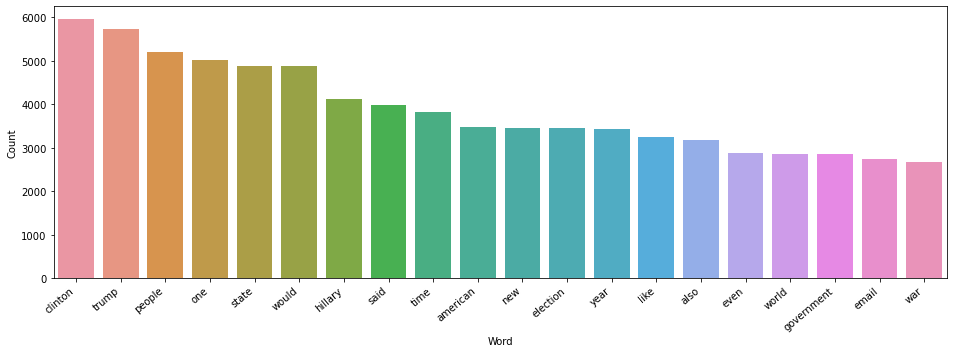

In [25]:
# selecting top 20 most frequent hashtags.     
d = d.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Word", y = "Count")
ax.set_xticklabels(d["Word"], rotation=40, ha="right")
ax.set(ylabel = 'Count')
plt.show()

In [26]:
#creating a bag of words with the consecutive frequency for Real text.
real_text_vis =' '.join([str(x) for x in news_df[news_df['label']=='REAL']['New_text']])
a = nltk.FreqDist(real_text_vis.split())
d = pd.DataFrame({'Word': list(a.keys()),
                  'Count': list(a.values())})
d.sample(10)

,Word,Count
43218,diffused,2
876,“not,95
42157,pagan,2
12090,“nightmare,1
32458,westfield,3
45867,dalaf,1
11787,sang,12
26445,1914,4
48127,retreating”,1
40306,nearrecord,2


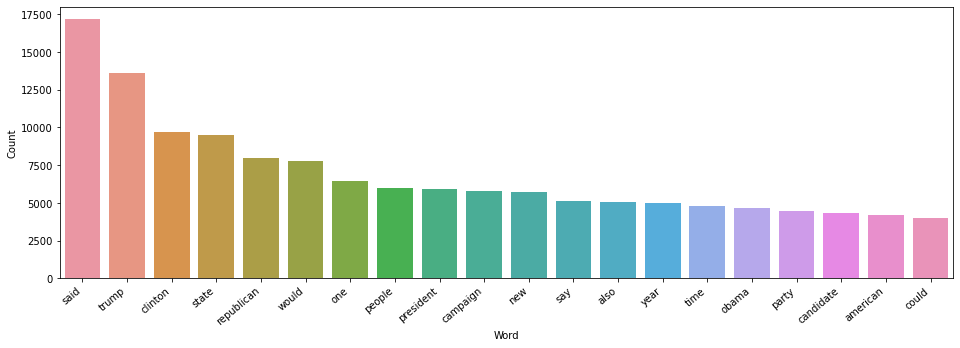

In [27]:
d = d.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Word", y = "Count")
ax.set_xticklabels(d["Word"], rotation=40, ha="right")
ax.set(ylabel = 'Count')
plt.show()

In [28]:
#Label Encoding.
news_df["label"]=news_df["label"].replace(["FAKE","REAL"],value=[1,0]) 

In [29]:
news_df.head()

,title,text,label,New_text
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",1,daniel greenfield shillman journalism fellow f...
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,1,google pinterest digg linkedin reddit stumbleu...
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,0,secretary state john kerry said monday stop pa...
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",1,kaydee king kaydeeking november 2016 lesson to...
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,0,primary day new york frontrunners hillary clin...


In [30]:
#Splitting data into test and train.
X_train,X_test,y_train,y_test = train_test_split(news_df['New_text'],news_df['label'],test_size=0.2, random_state = 10)

In [31]:
#TF-IDF : Term Frequency - Inverse Document Frequency
tfidf = TfidfVectorizer()
X_train = tfidf.fit_transform(X_train)
X_test = tfidf.transform(X_test)
print(X_train.shape)
print(X_test.shape)


(5068, 70803)
(1267, 70803)


# Radndom Forest Classifier. 

Accuracy score : 0.9060773480662984


(<Figure size 432x288 with 2 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

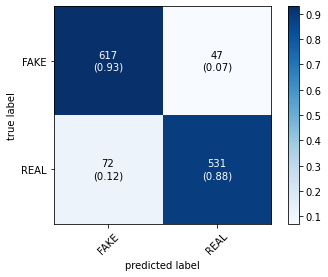

In [32]:
model1= RandomForestClassifier()
model1.fit(X_train,y_train)
pred1 = model1.predict(X_test)
accuracy1 = accuracy_score(y_test,pred1)
cm1 = confusion_matrix(y_test,pred1)
print("Accuracy score : {}".format(accuracy1))
plot_confusion_matrix(conf_mat=cm1,show_absolute=True,
                                show_normed=True,
                                colorbar=True,class_names=['FAKE','REAL'])

# Logistic Regression.

Accuracy score : 0.9194948697711128


(<Figure size 432x288 with 2 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

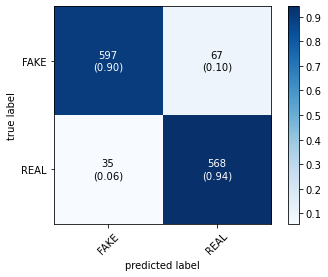

In [33]:
model2 = LogisticRegression(max_iter = 500)
model2.fit(X_train, y_train)
pred2 = model2.predict(X_test)
accuracy2 = accuracy_score(y_test,pred2)
cm2 = confusion_matrix(y_test,pred2)
print("Accuracy score : {}".format(accuracy2))
plot_confusion_matrix(conf_mat=cm2,show_absolute=True,
                                show_normed=True,
                                colorbar=True,class_names=['FAKE','REAL'])

# Passive Aggressive Classifier

Accuracy score : 0.9455406471981057


(<Figure size 432x288 with 2 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

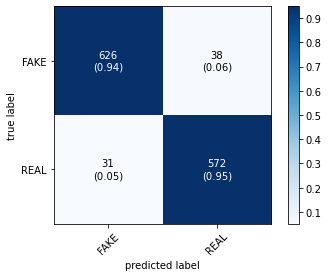

In [34]:
model3 = PassiveAggressiveClassifier(max_iter=50)
model3.fit(X_train,y_train)
pred3 = model3.predict(X_test)
accuracy3 = accuracy_score(y_test,pred3)
cm3 = confusion_matrix(y_test,pred3)
print("Accuracy score : {}".format(accuracy3))
plot_confusion_matrix(conf_mat=cm3,show_absolute=True,
                                show_normed=True,
                                colorbar=True,class_names=['FAKE','REAL'])

# Support Vector Classification.

Accuracy score : 0.9376479873717443


(<Figure size 432x288 with 2 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

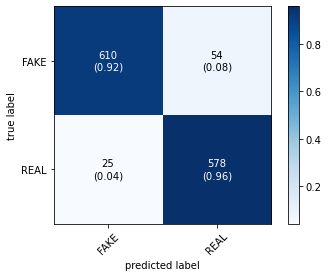

In [35]:
model4=SVC()
model4.fit(X_train,y_train)
pred4 = model4.predict(X_test)
accuracy4 = accuracy_score(y_test,pred4)
cm4 = confusion_matrix(y_test,pred4)
print("Accuracy score : {}".format(accuracy4))
plot_confusion_matrix(conf_mat=cm4,show_absolute=True,
                                show_normed=True,
                                colorbar=True,class_names=['FAKE','REAL'])

# Decision Tree Classifier

Accuracy score : 0.8066298342541437


(<Figure size 432x288 with 2 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

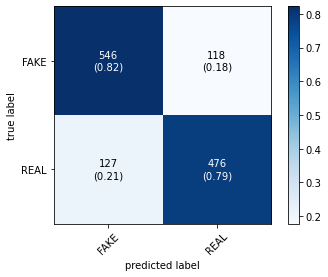

In [36]:
model5=DecisionTreeClassifier()
model5.fit(X_train,y_train)
pred5 = model5.predict(X_test)
accuracy5 = accuracy_score(y_test,pred5)
cm5 = confusion_matrix(y_test,pred5)
print("Accuracy score : {}".format(accuracy5))
plot_confusion_matrix(conf_mat=cm5,show_absolute=True,
                                show_normed=True,
                                colorbar=True,class_names=['FAKE','REAL'])

In [37]:
#Creating the Dictionary with model name as key and accuracy as key-value
labels={'RandomForestClassifier':accuracy1,'LogisticRegression':accuracy2,'PassiveAggressiveClassifier':accuracy3,
        'SVC':accuracy4,'DecisionTreeClassifier':accuracy5}

<BarContainer object of 5 artists>

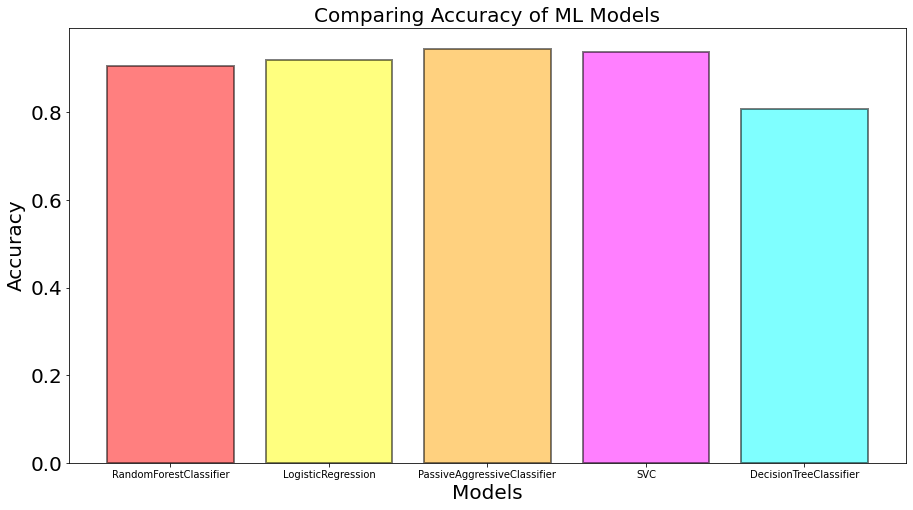

In [38]:
#Plotting accuracy of all the models with Bar-Graphs
plt.figure(figsize=(15,8))
plt.title('Comparing Accuracy of ML Models',fontsize=20)
colors=['red','yellow','orange','magenta','cyan']
plt.xticks(fontsize=10,color='black')
plt.yticks(fontsize=20,color='black')
plt.ylabel('Accuracy',fontsize=20)
plt.xlabel('Models',fontsize=20)
plt.bar(labels.keys(),labels.values(),edgecolor='black',color=colors, linewidth=2,alpha=0.5)